# LinkedIn Job Posting Analysis

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [18]:
# Load all datasets
job_postings = pd.read_csv("postings.csv")

In [19]:
job_postings.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [20]:
job_postings.drop(['fips', 'sponsored', 'posting_domain', 'application_type','application_url','job_posting_url'],axis=1,inplace=True)

In [21]:
# Use "Not Specified" for categorical columns with missing values
cols_fill_not_specified = [
    'skills_desc', 'pay_period','compensation_type',
    'formatted_experience_level',
    'zip_code'
]
for col in cols_fill_not_specified:
    job_postings[col].fillna("Not Specified", inplace=True)


/var/folders/jw/7nf2z3xn4s9c6x_s6_gczsvc0000gn/T/ipykernel_66517/4072428806.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  job_postings[col].fillna("Not Specified", inplace=True)
/var/folders/jw/7nf2z3xn4s9c6x_s6_gczsvc0000gn/T/ipykernel_66517/4072428806.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Specified' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  job_postings[col].fillna("Not S

In [22]:
# Fill numerical columns with zeros
cols_fill_zero = [
    'applies', 'views', 'remote_allowed'
]
for col in cols_fill_zero:
    job_postings[col].fillna(0, inplace=True)

/var/folders/jw/7nf2z3xn4s9c6x_s6_gczsvc0000gn/T/ipykernel_66517/611948478.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  job_postings[col].fillna(0, inplace=True)


In [23]:
# lowercase all job titles
def initial_cleaning(title):
    # Convert to lowercase and remove special characters and whitespace
    title = title.lower()
    title = re.sub(r'[^\w\s]', '', title)  # Remove punctuation
    title = re.sub(r'\s+', ' ', title).strip()  # Remove extra spaces

    return title

job_postings['std_title'] = job_postings['title'].apply(initial_cleaning)

In [24]:
job_postings.groupby('std_title',as_index=False).agg({'job_id':'count'}).sort_values('job_id',ascending=False).head(50)

,std_title,job_id
52803,sales manager,673
14396,customer service representative,482
45929,project manager,361
4176,assistant store manager,320
1618,administrative assistant,261
54537,senior accountant,246
53211,salesperson,241
20949,executive assistant,232
48395,registered nurse,216
47766,receptionist,205


In [25]:
# normalize salary
def normalize_salary(row):
    salary = row['med_salary'] if pd.notna(row['med_salary']) else row[
        'min_salary']  # Use median if available, else minimum
    pay_period = row['pay_period']

    if pay_period == 'YEARLY':
        return salary
    elif pay_period == 'MONTHLY':
        return salary * 12
    elif pay_period == 'WEEKLY':
        return salary * 52
    elif pay_period == 'HOURLY':
        return salary * 2080  # Assuming 2080 hours per year (40 hours/week * 52 weeks)
    else:
        return salary


# Apply the function to create a new normalized salary column
job_postings['Normalized_salary'] = job_postings.apply(normalize_salary, axis=1)


In [26]:
# deal with geo location
# Function to split location column into 'city' and 'state'
def split_location(location):
    if pd.notnull(location) and ',' in location:
        parts = location.split(',')
        # Ensure there are exactly two parts (city and state) to keep only valid entries
        if len(parts) == 2:
            return parts[0].strip(), parts[1].strip()
    # Return NaN if format does not match "city, state"
    return np.nan, np.nan


# Apply the function and create two new columns 'city' and 'state'
job_postings['city'], job_postings['state'] = zip(
    *job_postings['location'].map(split_location))

In [27]:
job_postings.drop(['normalized_salary',
                   'title', 'description', 'skills_desc'],
                  axis=1,
                  inplace=True)

## 1. Distribution of Jobs by Work Type

In [28]:
companies = pd.read_csv("companies_cleaned.csv")
job_industry = pd.read_csv("job_industries_mapped.csv")
job_skill = pd.read_csv("job_postings_cleaned.csv")

In [29]:
# Check for missing values and unique values in 'formatted_work_type' column to prepare for analysis
work_type_counts = job_postings['formatted_work_type'].value_counts(
    dropna=False)
work_type_counts_nulls = job_postings['formatted_work_type'].isnull().sum()

# Calculate percentage distribution for each work type
work_type_percentages = work_type_counts / work_type_counts.sum() * 100

# Combine counts and percentages into a single DataFrame for a detailed summary
work_type_distribution = pd.DataFrame({
    'Count': work_type_counts,
    'Percentage': work_type_percentages
})
work_type_distribution

,Count,Percentage
formatted_work_type,,
Full-time,98814,79.785868
Contract,12117,9.783688
Part-time,9696,7.828888
Temporary,1190,0.960847
Internship,983,0.793708
Volunteer,562,0.453778
Other,487,0.393221


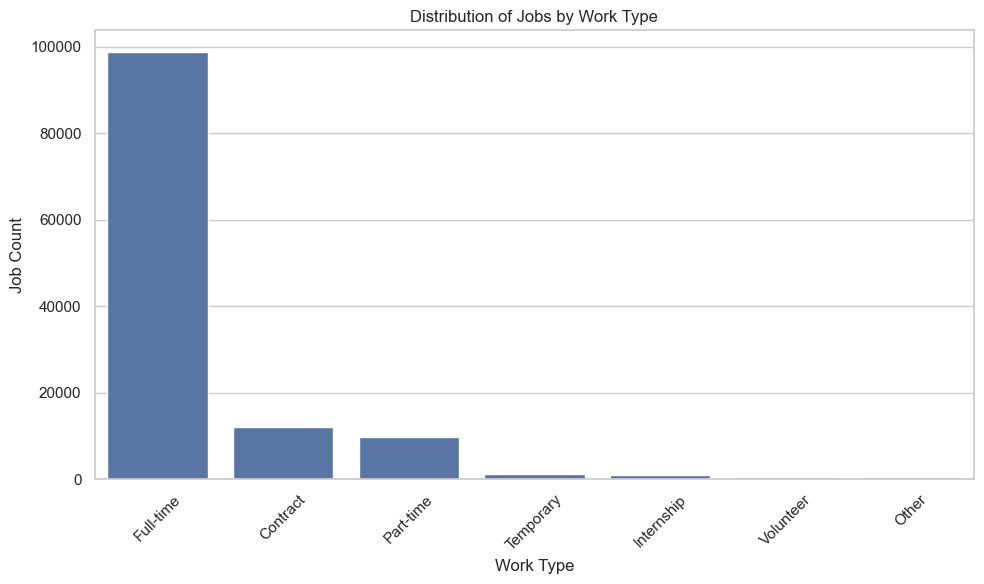

In [30]:
# Set up the Seaborn style for enhanced visualization
sns.set(style="whitegrid")

# Plotting the distribution of job types with Seaborn for enhanced aesthetics
plt.figure(figsize=(10, 6))
sns.barplot(x=work_type_distribution.index,
            y=work_type_distribution['Count'])
plt.title("Distribution of Jobs by Work Type")
plt.xlabel("Work Type")
plt.ylabel("Job Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the enhanced plot
plt.show()

## 2. Companies with Most Job Postings

In [31]:
# calculate the number of job postings per company
company_job_postings_grouped = job_postings.groupby(
    'company_name').size().sort_values(ascending=False).head(20)

# Convert the result to a DataFrame for easier handling and display
top_companies_grouped = company_job_postings_grouped.reset_index(
    name='Job Postings')

# Show the DataFrame for internal reference as well
top_companies_grouped

,company_name,Job Postings
0,Liberty Healthcare and Rehabilitation Services,1108
1,The Job Network,1003
2,J. Galt,604
3,TEKsystems,529
4,"Lowe's Companies, Inc.",527
5,Ingersoll Rand,517
6,Capital One,496
7,Cogent Communications,476
8,Insight Global,418
9,Dice,415


/var/folders/jw/7nf2z3xn4s9c6x_s6_gczsvc0000gn/T/ipykernel_66517/129172596.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Job Postings",


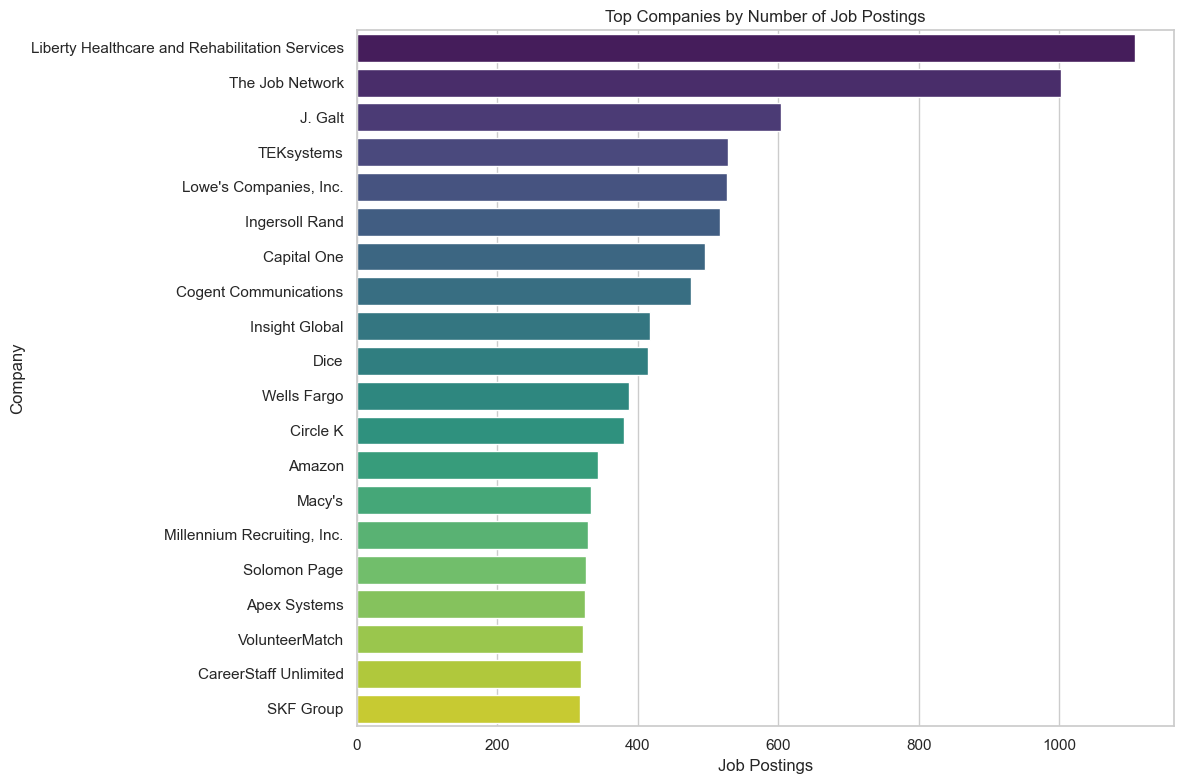

In [32]:
# Plotting the top companies with the most job postings
plt.figure(figsize=(12, 8))
sns.barplot(x="Job Postings",
            y="company_name",
            data=top_companies_grouped,
            palette="viridis")
plt.title("Top Companies by Number of Job Postings")
plt.xlabel("Job Postings")
plt.ylabel("Company")
plt.tight_layout()

# Display the plot
plt.show()

## 3. Job numbers by experience level

In [33]:
# Group by 'formatted_experience_level' to count job numbers
job_counts_experience = job_postings[
    'formatted_experience_level'].value_counts()

# Calculate salary statistics by experience level using groupby
salary_by_experience = job_postings.groupby(
    'formatted_experience_level')['Normalized_salary'].describe()

# Return both DataFrames for internal reference
job_counts_experience

formatted_experience_level
Mid-Senior level    41489
Entry level         36708
Not Specified       29409
Associate            9826
Director             3746
Internship           1449
Executive            1222
Name: count, dtype: int64

In [34]:
salary_by_experience

,count,mean,std,min,25%,50%,75%,max
formatted_experience_level,,,,,,,,
Associate,3891.0,72302.466389,4.036043e+04,1.0,50000.0,65000.0,85000.0,1080000.0
Director,1268.0,146554.019677,5.662435e+04,1.0,113040.0,142000.0,175000.0,575000.0
Entry level,9126.0,222922.448523,6.198505e+06,15.0,37440.0,47840.0,66912.0,499200000.0
Executive,382.0,173644.656309,8.253583e+04,175.0,120000.0,168790.0,220000.0,525000.0
Internship,378.0,831590.582989,5.365346e+06,15.0,37440.0,41600.0,52000.0,41533440.0
Mid-Senior level,12909.0,195261.378317,5.056073e+06,0.0,65000.0,91000.0,121628.0,315952000.0
Not Specified,8119.0,139600.383880,3.372783e+06,0.0,45000.0,66206.0,100000.0,208000000.0


/var/folders/jw/7nf2z3xn4s9c6x_s6_gczsvc0000gn/T/ipykernel_66517/1876679821.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_counts_experience.index,


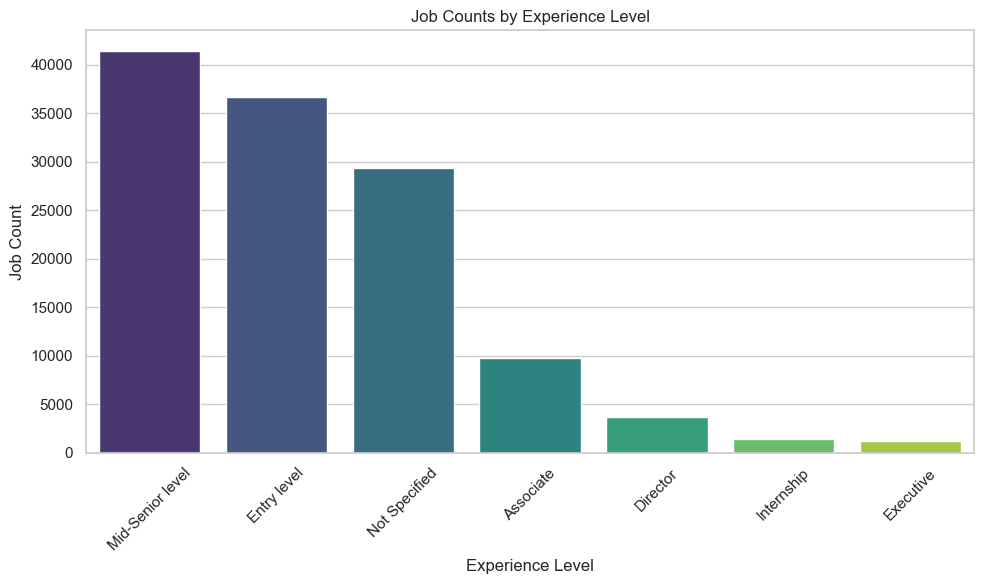

In [35]:
# Plotting job counts by experience level using Seaborn for enhanced aesthetics
plt.figure(figsize=(10, 6))
sns.barplot(x=job_counts_experience.index,
            y=job_counts_experience.values,
            palette="viridis")
plt.title("Job Counts by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Job Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

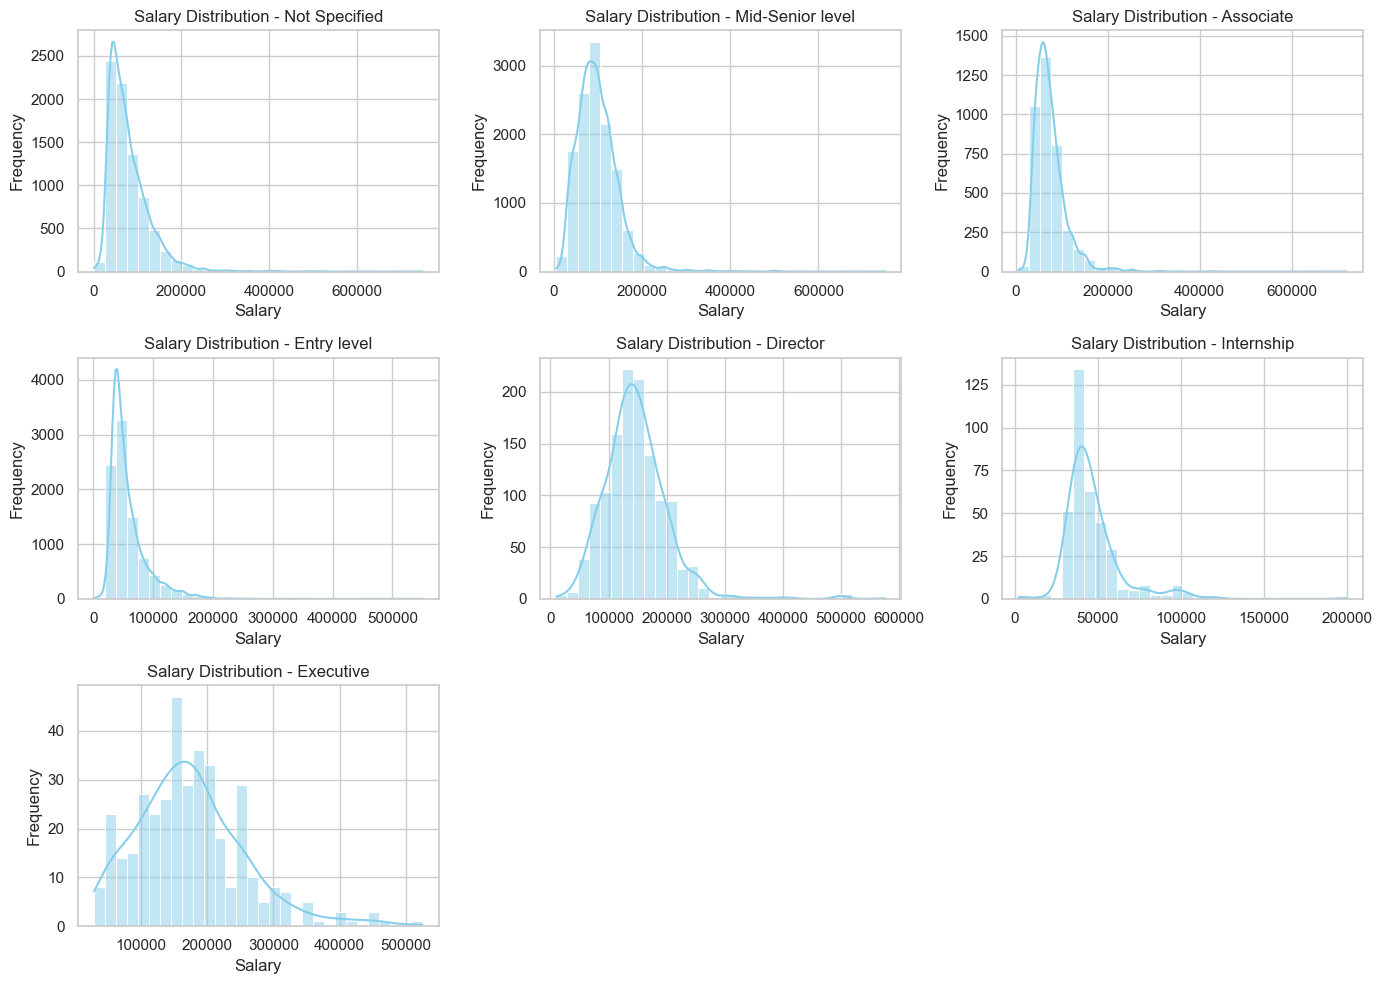

In [36]:
# Proceeding with histograms for each experience level to visualize the salary distribution without log scale
filtered_job_postings = job_postings[
    (job_postings['Normalized_salary'] >= 1000)
    & (job_postings['Normalized_salary'] <= 1000000)]
# Set up the figure for subplots
plt.figure(figsize=(14, 10))

# Plotting histograms for each experience level
experience_levels = filtered_job_postings['formatted_experience_level'].unique(
)

for i, level in enumerate(experience_levels, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data=filtered_job_postings[
        filtered_job_postings['formatted_experience_level'] == level],
                 x="Normalized_salary",
                 bins=30,
                 color="skyblue",
                 kde=True)
    plt.title(f"Salary Distribution - {level}")
    plt.xlabel("Salary")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## 